In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/preprocessed/merged_tidy.csv')

Saved figure: paper\figs\mortality_vs_gdpcapita_scatter.png


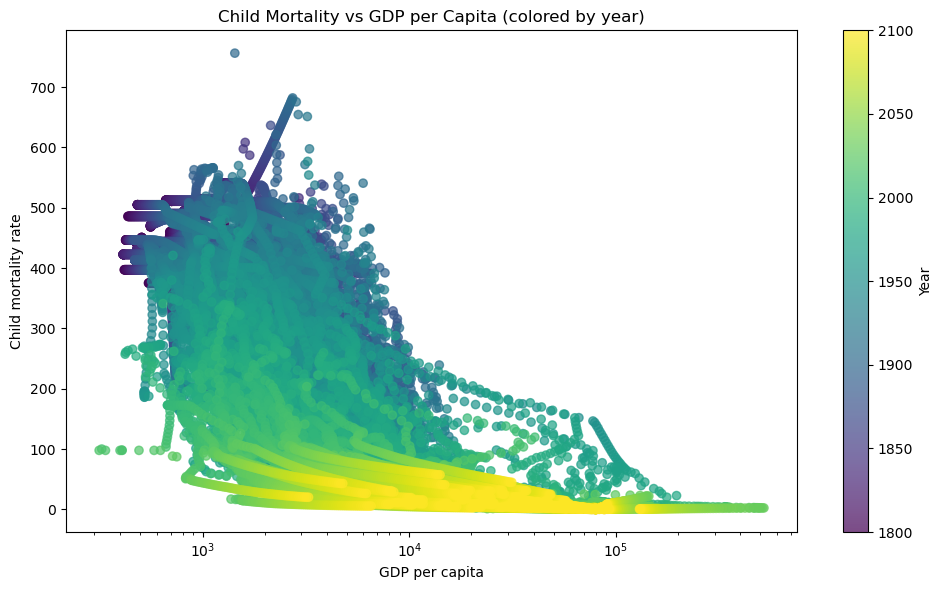

In [5]:
outdir = Path("paper/figs")
outdir.mkdir(parents=True, exist_ok=True)
outfile = outdir / "mortality_vs_gdpcapita_scatter.png"

df["mortality_rate"] = pd.to_numeric(df["mortality_rate"], errors="coerce")
df["gdpcapita"] = pd.to_numeric(df["gdpcapita"], errors="coerce")
df["year"] = pd.to_numeric(df["year"], errors="coerce")

df = df.dropna(subset=["mortality_rate", "gdpcapita", "year"])
df = df[df["gdpcapita"] > 0] 

# Plot
plt.figure(figsize=(10, 6))
sc = plt.scatter(
    df["gdpcapita"],
    df["mortality_rate"],
    c=df["year"],
    alpha=0.7
)
plt.xscale("log")
plt.xlabel("GDP per capita")
plt.ylabel("Child mortality rate")
plt.title("Child Mortality vs GDP per Capita (colored by year)")
cbar = plt.colorbar(sc)
cbar.set_label("Year")
plt.tight_layout()
plt.savefig(outfile, dpi=300)


print(f"Saved figure: {outfile}")
